<a href="https://colab.research.google.com/github/HammadN98/Analise-da-cobertura-de-vacinacao/blob/main/Aprendizado-de-maquina/ELT574_%3CMatr%C3%ADcula%3E_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade de Progrmacao 2

1. Utilize o notebook disponibilizado para o problema de classificação multiclasse Fashion MNIST e, ajustando diferentes hiperparâmetros de treinamento, tente atingir 90% de acurácia nas inferências. Apresente o gráfico de treinamento e validação da função de loss. Caso não consiga atingir este nível de precisão, mostre qual foi seu melhor resultado.

##Obs: Criei um notebook novo para fugir da poluicao de todo aquele notebook disponibilizado. Logo so pegarei os codigos importantes dele, e alterarei os hyperparametros como o exercicio pede.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam


In [9]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(f"Dados de Treino: {X_train_full.shape, y_train_full.shape}")
print(f"Dados de Teste: {X_test.shape, y_test.shape}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dados de Treino: ((60000, 28, 28), (60000,))
Dados de Teste: ((10000, 28, 28), (10000,))


In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255. #o ponto em 255. caracteriza a conversao para float
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

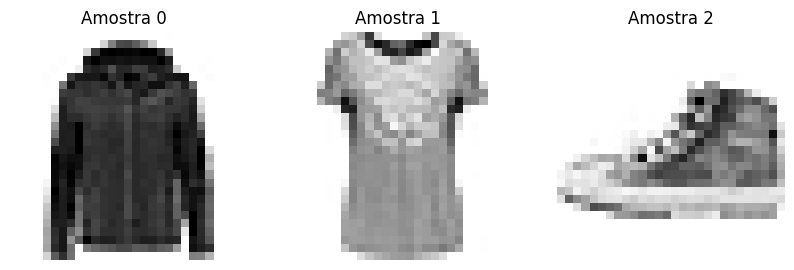

In [11]:
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.imshow(X_train[0], cmap="binary")
plt.title('Amostra 0')
plt.axis('off')

plt.subplot(132)
plt.imshow(X_train[1], cmap="binary")
plt.title('Amostra 1')
plt.axis('off')

plt.subplot(133)
plt.imshow(X_train[2], cmap="binary")
plt.title('Amostra 2')
plt.axis('off')
plt.show()

Coat


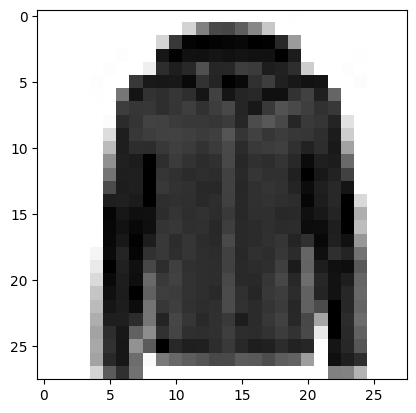

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary");

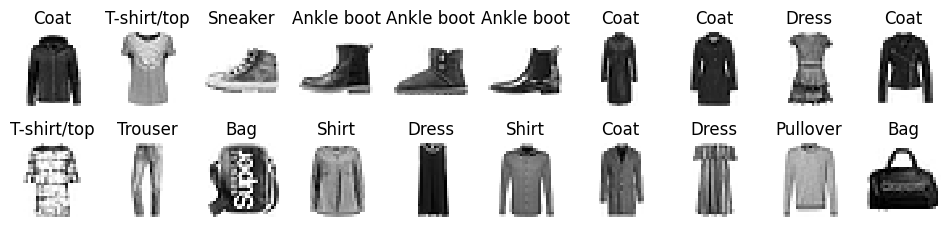

In [16]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

Podemos atribuir uma camada a uma variável para manipular os parâmetros da camada.

In [21]:
hidden1 = model.layers[1]
hidden1

<Dense name=dense, built=True>

Os parâmetros de cada camada podem ser acessados e alterados com os métodos `get_weights()` e `set_weights()`

In [22]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03521007,  0.0701582 ,  0.0360196 , ..., -0.0036366 ,
        -0.02985786, -0.03735801],
       [ 0.04875157,  0.06551705,  0.00755192, ...,  0.00775089,
        -0.06829567, -0.05329195],
       [-0.06404628, -0.01011943, -0.00520051, ..., -0.04376626,
         0.03274874, -0.02891382],
       ...,
       [ 0.00067899, -0.0403113 ,  0.05061965, ...,  0.03035259,
         0.05527847, -0.02471788],
       [ 0.03693521,  0.01417819, -0.06564913, ..., -0.03520526,
        -0.03352964,  0.00026663],
       [-0.02546545, -0.02650445, -0.01108387, ..., -0.01630364,
        -0.02497759,  0.05849499]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases.shape

(300,)

A finalização do modelo é feita compilando as últimas informações que devem ser repassadas à estrutura do PMC, a função de otimização, o otimizador e o indicador de métrica.

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

A função de otimização `'sparse_categorical_crossentropy'` é utilizada porque cada saída está rolutada de 0 a 9. Se fosse um vetor dummy (`[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]`), poderíamos utilizar a função `'categorical_crossentropy'`.

Se fosse um problema de classificação binária, utilizaríamos a função `'binary_crossentropy'` e a função de ativação `'sigmoid'` como função de ativação na camada de saída.

## Treinando o modelo

In [26]:
history = model.fit(X_train,y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6746 - loss: 1.0002 - val_accuracy: 0.8352 - val_loss: 0.5022
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8227 - loss: 0.5091 - val_accuracy: 0.8428 - val_loss: 0.4529
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8412 - loss: 0.4507 - val_accuracy: 0.8590 - val_loss: 0.4143
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8496 - loss: 0.4309 - val_accuracy: 0.8586 - val_loss: 0.4098
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8610 - loss: 0.3989 - val_accuracy: 0.8558 - val_loss: 0.4037
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8615 - loss: 0.3901 - val_accuracy: 0.8596 - val_loss: 0.4007
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8706 - loss: 0.3695 - val_accuracy: 0.8694 - val_loss: 0.3744
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8702 - loss: 0.3662 - 

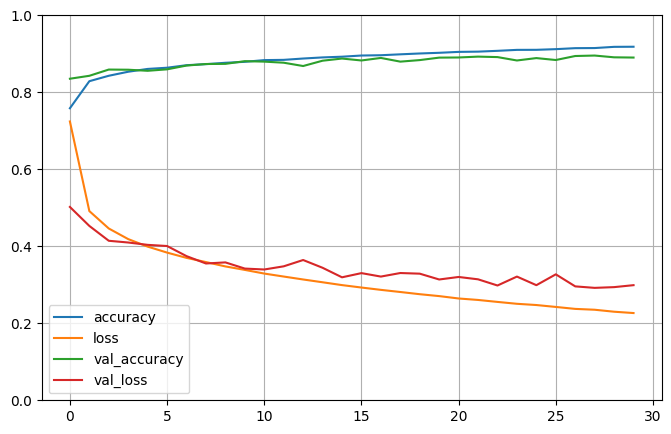

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # ajusta o eixo y para os limites de 0 a 1
plt.show()

In [28]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8842 - loss: 0.3325


[0.3319457769393921, 0.883899986743927]

In [29]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
confusion_matrix(y_test, np.argmax(y_pred,axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[832,   2,   9,  15,   5,   1, 125,   0,  11,   0],
       [  3, 971,   0,  20,   2,   0,   3,   0,   1,   0],
       [ 18,   2, 726,  13, 125,   1, 107,   0,   8,   0],
       [ 32,  10,   9, 882,  35,   0,  26,   0,   6,   0],
       [  2,   0,  42,  25, 827,   1,  96,   0,   7,   0],
       [  0,   0,   0,   1,   0, 957,   0,  27,   2,  13],
       [120,   2,  50,  21,  48,   0, 746,   0,  13,   0],
       [  0,   0,   0,   0,   0,  14,   0, 970,   1,  15],
       [  4,   0,   0,   5,   3,   1,   5,   5, 977,   0],
       [  1,   0,   0,   0,   0,   8,   0,  40,   0, 951]])

Resolucao

In [32]:
model2 = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten transforma a matriz 28x28 em um vetor de 784 elementos
    Dense(128, activation='relu'),  # Camada totalmente conectada com 128 neurônios
    Dropout(0.3),                   # Dropout para regularização
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # Camada de saída com 10 neurônios (classes)
])

# Compilar o modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                     validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9536 - loss: 0.1240 - val_accuracy: 0.8966 - val_loss: 0.4232
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9517 - loss: 0.1292 - val_accuracy: 0.8896 - val_loss: 0.4226
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9529 - loss: 0.1208 - val_accuracy: 0.8888 - val_loss: 0.4493
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9548 - loss: 0.1162 - val_accuracy: 0.8988 - val_loss: 0.4120
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9560 - loss: 0.1147 - val_accuracy: 0.8982 - val_loss: 0.4257
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9560 - loss: 0.1139 - val_accuracy: 0.9022 - val_loss: 0.4286
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9577 - loss: 0.1126 - val_accuracy: 0.8984 - val_loss: 0.4657
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9596 - loss: 0

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8949 - loss: 0.5873
Acurácia no conjunto de teste: 89.35%


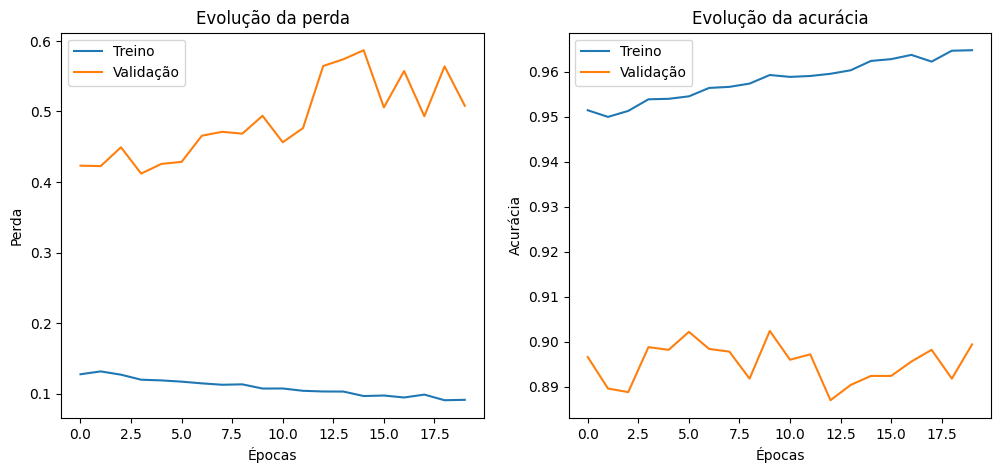

In [42]:
plt.figure(figsize=(12, 5))
# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Evolução da acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.show()


In [43]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping])


Epoch 1/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9694 - loss: 0.0826 - val_accuracy: 0.9622 - val_loss: 0.0964
Epoch 2/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9698 - loss: 0.0803 - val_accuracy: 0.9593 - val_loss: 0.1070
Epoch 3/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9701 - loss: 0.0808 - val_accuracy: 0.9548 - val_loss: 0.1191
Epoch 4/50
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9706 - loss: 0.0767 - val_accuracy: 0.9591 - val_loss: 0.1103


## matriz de confusão

print("Matrix de confusão")
plt.show()

corrMatrix = X_test[used_features].corr()
plt.matshow(corrMatrix)
plt.show()

f = plt.figure(figsize=(10, 10))
plt.matshow(corrMatrix, fignum=f.number)
plt.xticks(range(X_test[used_features].shape[1]), X_test[used_features].columns, fontsize=10, rotation=90)
plt.yticks(range(X_test[used_features].shape[1]), X_test[used_features].columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
